In [1]:
# Importing Libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
## Checking the version of tensorflow and keras
print(f"Tensorflow Version {tf.__version__}")


Tensorflow Version 2.15.0


In [3]:
os.getcwd()

'/content'

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
check_list = ["GPU", "CPU"]

for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0 :
        print(f"(device) is available")
        print(f"Details >> {out}")

    else:
        print(f"(device) isn't available")

(device) is available
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
(device) is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a Simple Classifier Using Keras on MNIST data

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [10]:
(X_train_full, y_train_full), (X_test, y_test ) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [14]:
print(f"data type of X_train_full : {X_train_full.dtype},\n shape of X_train_full :{X_train_full.shape}")

data type of X_train_full : uint8,
 shape of X_train_full :(60000, 28, 28)


In [15]:
# Create a Validation Data set from the full traing data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Scaled the test set as well
X_test = X_test / 255

In [16]:
# TRAIN = 55000
# VALID = 5000
# TEST = 10000

In [17]:
len(X_train_full[5000:])

55000

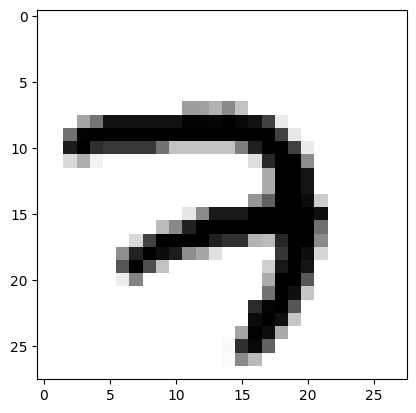

In [18]:
## Lets View the Some Data

plt.imshow(X_train[0], cmap = 'binary')
plt.show()

<Axes: >

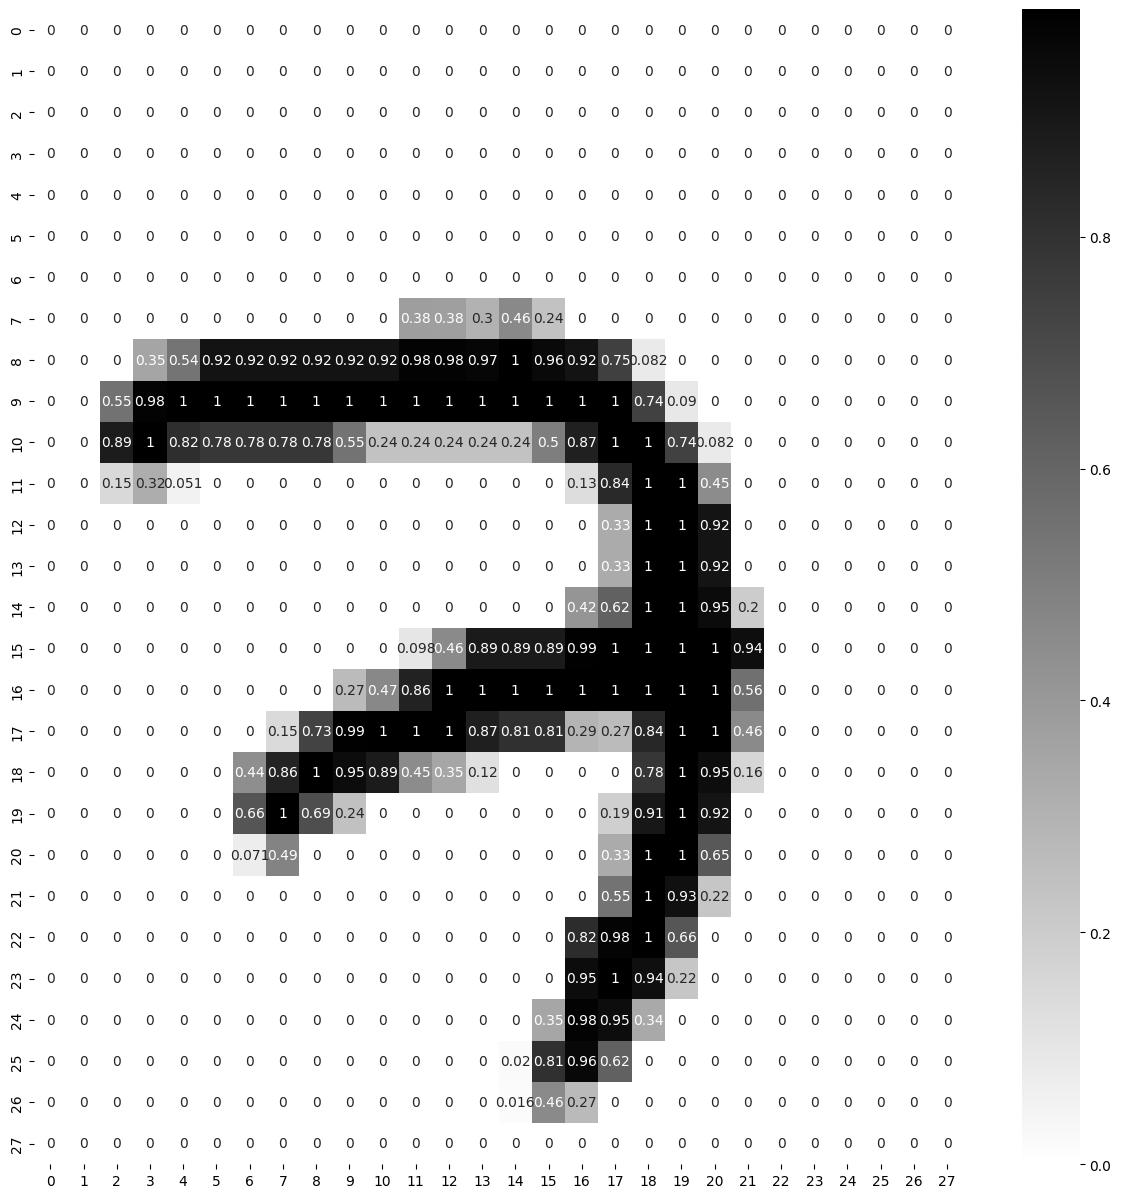

In [19]:
plt.figure(figsize = (15, 15))
sns.heatmap(X_train[0], annot = True, cmap = 'binary')

In [ ]:
28*28


784

In [ ]:
0,1,2,3,4,5,6,7,8,9

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [23]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

LAYERS = [tf.keras.layers.Flatten(input_shape = [28, 28], name = 'inputLayer'),
          tf.keras.layers.Dense(300, activation = 'relu', name = 'hiddenLayer1', kernel_regularizer = regularizers.L2(pow(10,-4))),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation = 'relu', name = 'hiddenLayer2'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation = 'relu', name = 'outputLayer')
          ]

model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
# ## Creating Layers of ANN or Defining Our Neural Networks
# ## METHOD 1

# LAYERS = [tf.keras.layers.Flatten(input_shape = [28, 28], name = "inputLayer"),
#           tf.keras.layers.Dense(300, activation = "relu", name = "hiddenLayer1"),
#           tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer2"),
#           tf.keras.layers.Dense(10, activation = "softmax", name ="outputLayer" )]

# model_clf = tf.keras.models.Sequential(LAYERS)


In [ ]:
# ## METHOD 2

# from keras.models import Sequential
# from keras.layers import Dense, Flatten

# ## Define the Model

# model = Sequential()
# model.add(Dense(units = 64, activation = "relu", input_dim = 100))
# model.add(Dense(units = 10, activation = "softmax"))

# ## Compile the model

# #model.compile(loss = 'categotical_crossenttropy', optimizer = 'sgd', metrics = ['accuracy'])

# ## train the model
# #model.fit(X_train, y _train, epocha = 5, batch_size = 32)


In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Define the Model

model = Sequential()
model.add(Flatten(input_shape = [28, 28], name = 'InputLayer'))
model.add(Dense(units = 64, activation = 'relu', kernel_regularizer = regularizers.L2(pow(10,-4))))
model.add(Dropout(0.2))
model.add(Dense(units = 32, activation = 'relu', kernel_regularizer = regularizers.L1L2(l1 = pow(10,-5), l2 = pow(10,-4))))
model.add(Dropout(0.1))
model.add(Dense(units = 16, activation = 'relu', kernel_regularizer = regularizers.L1(pow(10,-5))))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation = 'softmax'))

In [33]:
model.layers

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_10 (Dropout)        (None, 16)               

In [ ]:
## FirstLayer + SecondLayer + Bias
784*300+300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total Parametr to be trained
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
hidden1.get_weights()  ## one array of weightd and one array of Biases


[array([[-0.00189658, -0.02151236, -0.01612637, ..., -0.01083104,
         -0.02801185,  0.00390219],
        [-0.06533267, -0.02343981, -0.02637416, ..., -0.01741137,
          0.03266841, -0.06016728],
        [ 0.04174642,  0.00276911, -0.02104814, ..., -0.00997391,
          0.02358652,  0.03002852],
        ...,
        [ 0.07190236, -0.03395671,  0.02777556, ...,  0.04089377,
          0.03778809, -0.00533716],
        [-0.00279442, -0.05340199,  0.0327444 , ...,  0.00589814,
         -0.0516773 ,  0.03349026],
        [-0.00488683,  0.05968839, -0.01769174, ..., -0.05088632,
         -0.0059877 , -0.00048474]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
hidden1.get_weights()[1].shape

(300,)

In [ ]:
weights , biases = hidden1.get_weights()

In [ ]:
print("shapes\n", weights.shape, '\n')
weights

shapes
 (784, 300) 



array([[-0.00189658, -0.02151236, -0.01612637, ..., -0.01083104,
        -0.02801185,  0.00390219],
       [-0.06533267, -0.02343981, -0.02637416, ..., -0.01741137,
         0.03266841, -0.06016728],
       [ 0.04174642,  0.00276911, -0.02104814, ..., -0.00997391,
         0.02358652,  0.03002852],
       ...,
       [ 0.07190236, -0.03395671,  0.02777556, ...,  0.04089377,
         0.03778809, -0.00533716],
       [-0.00279442, -0.05340199,  0.0327444 , ...,  0.00589814,
        -0.0516773 ,  0.03349026],
       [-0.00488683,  0.05968839, -0.01769174, ..., -0.05088632,
        -0.0059877 , -0.00048474]], dtype=float32)

In [ ]:
print("shapes\n", biases.shape, '\n')
biases

shapes
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [39]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'  ## Use  => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = 'SGD' # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ['accuracy']

model.compile(loss = LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics = METRICS)

In [40]:
## TRANING

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs = EPOCHS,
                        validation_data = VALIDATION_SET, batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 1.4382 - accuracy: 0.5186 - val_loss: 0.5429 - val_accuracy: 0.8682
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7133 - accuracy: 0.7774 - val_loss: 0.3513 - val_accuracy: 0.9154
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5610 - accuracy: 0.8355 - val_loss: 0.2790 - val_accuracy: 0.9310
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4820 - accuracy: 0.8626 - val_loss: 0.2498 - val_accuracy: 0.9412
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4336 - accuracy: 0.8775 - val_loss: 0.2219 - val_accuracy: 0.9476
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3941 - accuracy: 0.8922 - val_loss: 0.2036 - val_accuracy: 0.9512
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3676 - accuracy: 0.9008 - val_loss: 0.1907 - val_accuracy:

In [42]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [43]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.438177,0.518564,0.542939,0.8682
1,0.713328,0.777400,0.351329,0.9154
2,0.560955,0.835509,0.278957,0.9310
3,0.482019,0.862636,0.249791,0.9412
4,0.433610,0.877527,0.221854,0.9476
5,0.394064,0.892182,0.203557,0.9512
6,0.367573,0.900836,0.190685,0.9544
7,0.347422,0.906836,0.179917,0.9604
8,0.326331,0.913836,0.174457,0.9600
9,0.309777,0.919036,0.169673,0.9610


<Axes: >

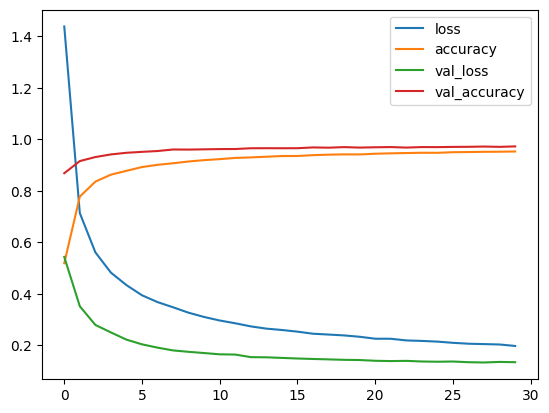

In [44]:
pd.DataFrame(history.history).plot()

In [45]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1348 - accuracy: 0.9705


[0.13482676446437836, 0.9704999923706055]

SAMPLE CHECK - TEST DATA

In [46]:
X_new = X_test[:3]
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [47]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

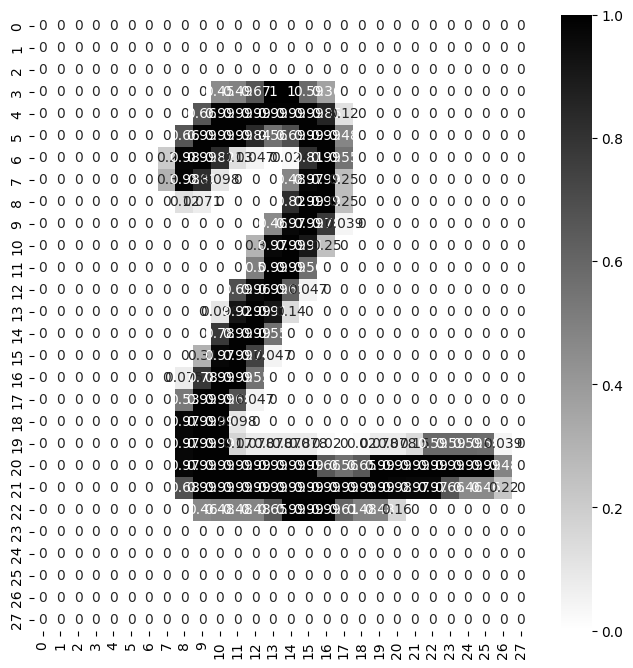

In [48]:
plt.figure(figsize = (8, 8))
sns.heatmap(X_test[1], annot = True, cmap = "binary")

In [49]:
y_prob = model_clf.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 195ms/step


array([[0.29, 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.22, 0.  , 0.  ],
       [0.26, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.43, 0.18, 0.  ],
       [0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.36, 0.  , 0.03]],
      dtype=float32)

In [50]:
y_prob

array([[2.9021332e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.4563219e-01, 0.0000000e+00, 2.1910979e-01,
        0.0000000e+00, 0.0000000e+00],
       [2.5794366e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.2835033e-01,
        1.8380207e-01, 0.0000000e+00],
       [2.3782068e-01, 0.0000000e+00, 4.4733286e-05, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.5786250e-01,
        0.0000000e+00, 2.8426409e-02]], dtype=float32)

In [51]:
y_pred = np.argmax(y_prob, axis = -1)

In [52]:
y_pred


array([0, 7, 7])

In [53]:
actual

array([7, 2, 1], dtype=uint8)

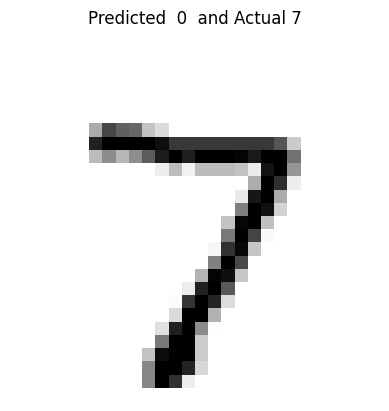

#############################


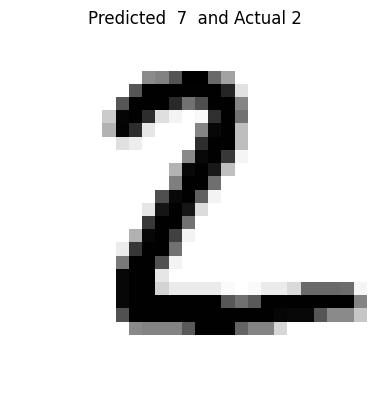

#############################


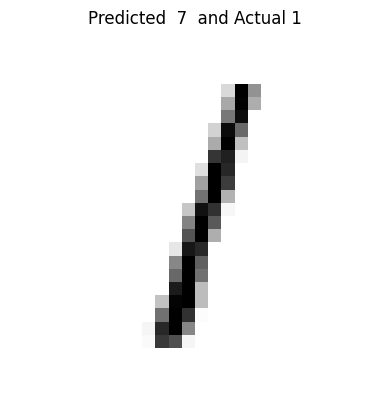

#############################


In [54]:
## Ploting

for data, pred, actual_data in zip(X_new,y_pred,actual):
  plt.imshow(data, cmap = "binary")
  plt.title(f"Predicted  {pred}  and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("#############################")